In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive', force_remount = True)


Mounted at /content/drive


In [70]:
#reading the given data set
path = 'drive/My Drive/sem6/ml hackathon/3.xls'
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel(path)


In [71]:
#eda
print(df.head(5))

                                 Item    2001-02    2002-03    2003-04  \
0       Imports (Foreign merchandise)  2451997.2  2972058.7  3591076.6   
1        Exports (Indian merchandise)  2090179.7  2551372.8  2933667.6   
2  Re-Exports (Foreign merchandise(1)        NaN        NaN        NaN   
3                       Total exports  2090179.7  2551372.8  2933667.6   
4                    Balance of trade  -361817.5  -420685.9  -657409.0   

     2004-05    2005-06    2006-07     2007-08     2008-09     2009-10  \
0  5010645.4  6604089.0  8405063.0  10123117.0  13744356.0  13637356.0   
1  3753395.3  4564178.0  5717792.0   6558635.0   8407551.0   8455336.0   
2        NaN        NaN        NaN         NaN         NaN         NaN   
3  3753395.3  4564178.0  5717792.0   6558635.0   8407551.0   8455336.0   
4 -1257250.1 -2039911.0 -2687270.0  -3564482.0  -5336805.0  -5182020.0   

      2010-11     2011-12  
0  16834670.0  23454632.0  
1  11429219.0  14659594.0  
2         NaN         NaN 

In [72]:
print(df.tail(5))

                       Item   2001-02   2002-03   2003-04    2004-05  \
5                  Treasure      28.0      61.7     173.7      168.1   
6                   Imports      34.9      37.5     230.6       31.1   
7                     Total      62.9      99.2     404.3      199.2   
8       Balance of trade(1)     -28.0     -61.7    -173.7     -168.1   
9  Visible balance of trade -361845.5 -420747.6 -657582.7 -1257418.2   

     2005-06    2006-07    2007-08    2008-09  2009-10  2010-11  2011-12  
5      104.0       61.0      326.0       25.0      NaN      NaN      NaN  
6       32.0       41.0       15.0        1.0      NaN      NaN      NaN  
7      136.0      102.0      341.0       26.0      NaN      NaN      NaN  
8     -104.0      -61.0     -326.0      -25.0      NaN      NaN      NaN  
9 -2040015.0 -2687331.0 -3564808.0 -5336805.0      NaN      NaN      NaN  


In [73]:
print(df.shape)

(10, 12)


In [74]:
print(df.describe())

            2001-02       2002-03       2003-04       2004-05       2005-06  \
count  9.000000e+00  9.000000e+00  9.000000e+00  9.000000e+00  9.000000e+00   
mean   6.565324e+05  8.037231e+05  9.048950e+05  1.111444e+06  1.294743e+06   
std    1.179646e+06  1.431451e+06  1.717692e+06  2.380297e+06  3.132752e+06   
min   -3.618455e+05 -4.207476e+05 -6.575827e+05 -1.257418e+06 -2.040015e+06   
25%   -2.800000e+01 -6.170000e+01 -1.737000e+02 -1.681000e+02 -1.040000e+02   
50%    3.490000e+01  6.170000e+01  2.306000e+02  1.681000e+02  1.040000e+02   
75%    2.090180e+06  2.551373e+06  2.933668e+06  3.753395e+06  4.564178e+06   
max    2.451997e+06  2.972059e+06  3.591077e+06  5.010645e+06  6.604089e+06   

            2006-07       2007-08       2008-09       2009-10       2010-11  \
count  9.000000e+00  9.000000e+00  9.000000e+00  4.000000e+00  4.000000e+00   
mean   1.607354e+06  1.790161e+06  2.209542e+06  6.341502e+06  8.571914e+06   
std    3.987829e+06  4.809888e+06  6.550815e+06  8.

In [75]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Item      10 non-null     object 
 1    2001-02  9 non-null      float64
 2    2002-03  9 non-null      float64
 3    2003-04  9 non-null      float64
 4    2004-05  9 non-null      float64
 5    2005-06  9 non-null      float64
 6   2006-07   9 non-null      float64
 7   2007-08   9 non-null      float64
 8   2008-09   9 non-null      float64
 9   2009-10   4 non-null      float64
 10  2010-11   4 non-null      float64
 11  2011-12   4 non-null      float64
dtypes: float64(11), object(1)
memory usage: 1.1+ KB
None


In [76]:
a=np.mean(df)
print(a)

 2001-02    6.565324e+05
 2002-03    8.037231e+05
 2003-04    9.048950e+05
 2004-05    1.111444e+06
 2005-06    1.294743e+06
2006-07     1.607354e+06
2007-08     1.790161e+06
2008-09     2.209542e+06
2009-10     6.341502e+06
2010-11     8.571914e+06
2011-12     1.099470e+07
dtype: float64


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [77]:
b=np.median(df.iloc[:,1:])
print(b)

nan


In [78]:
from scipy import stats
mode = stats.mode(df)

print(mode)



ModeResult(mode=array([['Imports (Foreign merchandise)', 2090179.7, 2551372.8, 2933667.6,
        3753395.3, 4564178.0, 5717792.0, 6558635.0, 8407551.0, 8455336.0,
        11429219.0, 14659594.0]], dtype=object), count=array([[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]]))


<ipython-input-78-0a9be14e1196>:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(df)
<ipython-input-78-0a9be14e1196>:2: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  mode = stats.mode(df)


Data pre processing

In [79]:
df=df.fillna(0)

In [80]:
#droping the rows with more than 50% of nan values
threshold = 0.5
# Drop columns with more than 50% NaN values
df = df.dropna(thresh=int(threshold * len(df)), axis=1)
# Drop rows with more than 50% NaN values
df = df.dropna(thresh=int(threshold * len(df.columns)), axis=0)
print(df)

                                 Item    2001-02    2002-03    2003-04  \
0       Imports (Foreign merchandise)  2451997.2  2972058.7  3591076.6   
1        Exports (Indian merchandise)  2090179.7  2551372.8  2933667.6   
2  Re-Exports (Foreign merchandise(1)        0.0        0.0        0.0   
3                       Total exports  2090179.7  2551372.8  2933667.6   
4                    Balance of trade  -361817.5  -420685.9  -657409.0   
5                            Treasure       28.0       61.7      173.7   
6                             Imports       34.9       37.5      230.6   
7                               Total       62.9       99.2      404.3   
8                 Balance of trade(1)      -28.0      -61.7     -173.7   
9            Visible balance of trade  -361845.5  -420747.6  -657582.7   

     2004-05    2005-06    2006-07     2007-08     2008-09     2009-10  \
0  5010645.4  6604089.0  8405063.0  10123117.0  13744356.0  13637356.0   
1  3753395.3  4564178.0  5717792.0   

In [81]:
# Define the lower and upper bounds for the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)

# Remove the outliers
df = df[~outliers]


<ipython-input-81-044fdbcab26c>:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)


ANALYZING THE PERFORMANCE OF THE MODEL

In [82]:
# Split the data into training and test sets
X = df.iloc[:,1:]
y = df.iloc[:,1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the performance of the model on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
print('Root Mean Squared Error:', rmse)


Root Mean Squared Error: 4.500455252770428e-09


In [83]:
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = df.iloc[:,1:]
y = df.iloc[:,1:]
# Create a random multi-output regression dataset
X, y = make_regression(n_samples=100, n_features=10, n_targets=3)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a multi-output regression model using RandomForestRegressor
model = MultiOutputRegressor(RandomForestRegressor(random_state=42))

# Train the model
model.fit(X_train, y_train)

# Evaluate the model on the test set
score = model.score(X_test, y_test)
print(f"R-sqared score: {score:.2f}")



R-sqared score: 0.60


In [84]:
from sklearn.metrics import mean_squared_error
# Calculate MSE
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.2f}")

MSE: 9283.50


DATA VISUVALIZATION

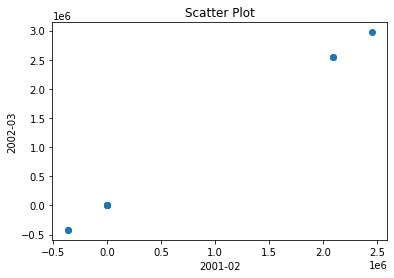

In [85]:
#scatetr plot
plt.scatter(df.iloc[:,1], df.iloc[:,2])
plt.xlabel('2001-02')
plt.ylabel('2002-03')
plt.title('Scatter Plot')
plt.show()


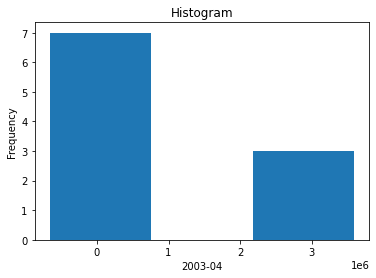

In [86]:
#Histogram
plt.hist(df.iloc[:,3], bins=3)
plt.xlabel('2003-04')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

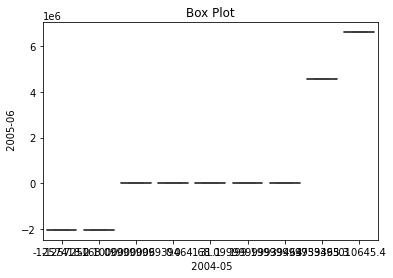

In [87]:
#box plot
sns.boxplot(x=df.iloc[:,4], y=df.iloc[:,5], data=df)
plt.title('Box Plot')
plt.show()

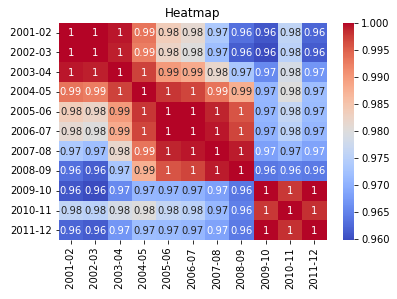

In [88]:
#Heatmap
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.title('Heatmap')
plt.show()

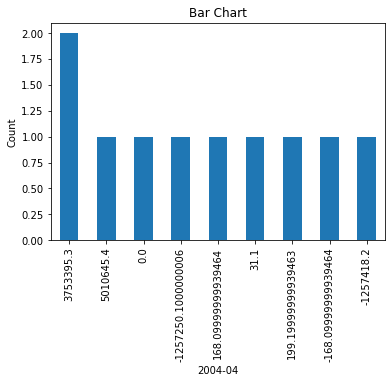

In [89]:
# Bar chart
df.iloc[:,4].value_counts().plot(kind='bar')
plt.xlabel('2004-04')
plt.ylabel('Count')
plt.title('Bar Chart')
plt.show()